# Desafio Etapa-1

## Bibliotecas

Importar pandas para a manipulação dos dados, e IPython para renderizar a imagem de referência.

In [1]:
import pandas as pd
from IPython.display import Image, display

## Dataset

Dataset fornecido para o desafio, fruto de webscraping:

- olhar a dimensão;
- examinar as colunas, e selecionar apenas o que for requerido para o desafio;
- com base no dataset fornecido, examinar o que precisa ser limpo para o desafio.

In [2]:
df_raw = pd.read_csv('./concert_tours_by_women.csv')
df_raw.shape

(20, 11)

In [3]:
df_raw.columns

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjustedgross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross', 'Ref.'],
      dtype='object')

reimportar o csv, agora apenas com as colunas necessárias e comparar com a imagem em .png fornecida

In [4]:
df = pd.read_csv(
    './concert_tours_by_women.csv',
    usecols=[
        'Rank',
        'Actual gross',
        'Adjustedgross (in 2022 dollars)',
        'Artist',
        'Tour title',
        'Shows',
        'Average gross',
        'Year(s)',
    ],
)

df

,Rank,Actual gross,Adjustedgross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross
0,1,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023-2024,56,"$13,928,571"
1,2,"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571"
2,3,"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008-2009,85,"$4,835,294"
3,4,"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018-2019,156,"$2,546,795"
4,5,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173"
5,6,"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709"
6,7,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008-2009,131,"$2,137,405"
7,8,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023-2024,41,"$6,282,927"
8,9,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215"
9,10,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882"


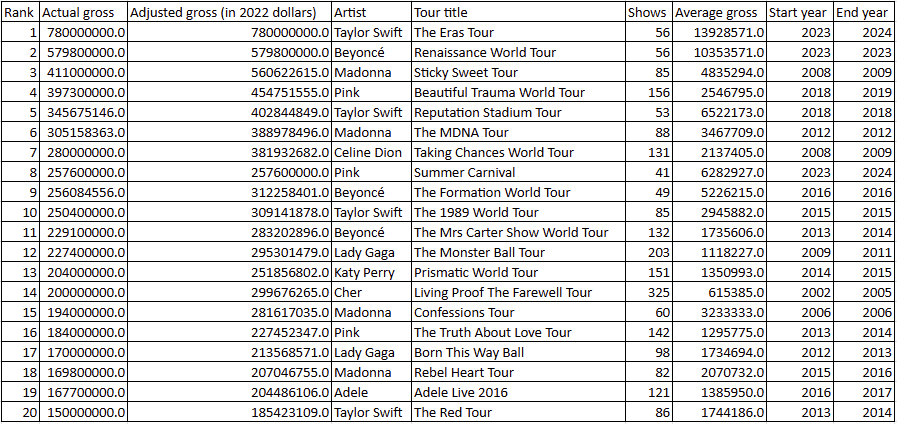

In [5]:
display(Image(filename='./Sprint+3+-+Resultado+CSV.png'))

## Resolução

Fases pensadas para a resolução da Etapa 1:

- Ajuste do título da coluna "Adjustedgross (in 2022 dollars)"
- Criação das colunas "Start year" e "End year"
- Limpeza e Transformação das colunas "Actual gross", "Adjusted gross (in 2022 dollars)" e "Average gross"
- Limpeza da coluna "Tour title"
- Conferir o Dataframe final para a exportação


### Ajuste do título da coluna "Adjustedgross (in 2022 dollars)"

In [6]:
df = df.rename(columns={'Adjustedgross (in 2022 dollars)': 'Adjusted gross (in 2022 dollars)'})

### Criação das colunas "Start year" e "End year"

In [7]:
df[['Start year', 'End year']] = df['Year(s)'].str.split('-', expand=True)
df['End year'] = df['End year'].fillna(df['Start year'])
df = df.drop('Year(s)', axis=1)

### Limpeza e Transformação das colunas "Actual gross", "Adjusted gross (in 2022 dollars)" e "Average gross"

In [8]:
aux = ['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Average gross']
df[aux] = df[aux].replace(r'[^\d.]', '', regex=True).astype(float)

### Limpeza da coluna "Tour title"

In [9]:
df['Tour title'] = (df['Tour title'].str.replace(r'\[.*?\]|[^\w\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip())

### Conferir o Dataframe final para a exportação

In [10]:
df

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,56,10353571.0,2023,2023
2,3,411000000.0,560622615.0,Madonna,Sticky Sweet Tour,85,4835294.0,2008,2009
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,156,2546795.0,2018,2019
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018
5,6,305158363.0,388978496.0,Madonna,The MDNA Tour,88,3467709.0,2012,2012
6,7,280000000.0,381932682.0,Celine Dion,Taking Chances World Tour,131,2137405.0,2008,2009
7,8,257600000.0,257600000.0,Pink,Summer Carnival,41,6282927.0,2023,2024
8,9,256084556.0,312258401.0,Beyoncé,The Formation World Tour,49,5226215.0,2016,2016
9,10,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85,2945882.0,2015,2015


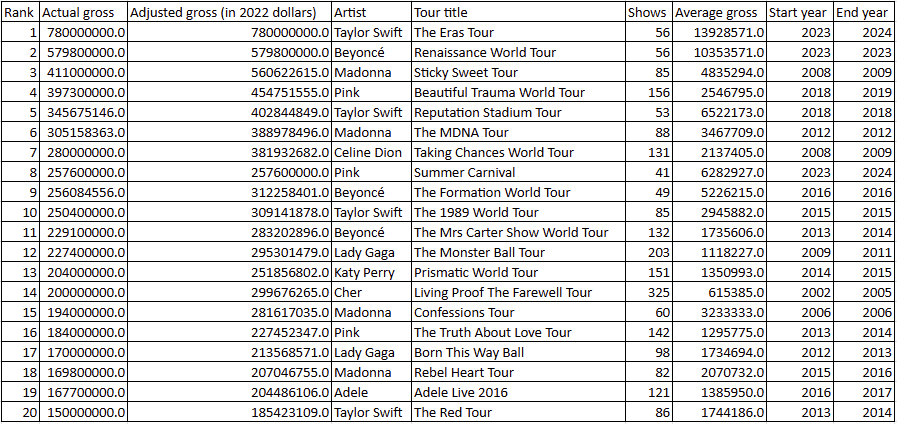

In [11]:
display(Image(filename='./Sprint+3+-+Resultado+CSV.png'))